# 0️⃣ Inicializar ambiente

In [1]:
# Este bloque es con la finalidad de garantizar que existan todas las dependencias, independiente donde se ejecute este notebook.

import subprocess
import sys
from importlib.metadata import version

# Imprimimos datos del entorno.
print("🟦 List Environment")
capture = subprocess.run([sys.executable, "--version"],capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"✅ {captureText}")
capture = subprocess.run([sys.executable, "-m", "pip", "--version"] ,capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"✅ {captureText}")
print("", end="\n\n")

print("🟦 Instalando bibliotecas externas")

print("✅ Instalando numpy")
# Ejecutamos el comando de consola, python -m pip install numpy y la salida de ese comando la mandamos al dispositivo /dev/null para que no salga en pantalla.
# Este comando nos permite instalar la lib numpy con el gestor de paquetes de Python pip.
subprocess.run([sys.executable, "-m", "pip", "install", "numpy"], stdout=subprocess.DEVNULL) 
# Como estamos seguros de la instalación de la library procedemos a importar.
import numpy as numpy

# Se hace el mismo paso para todas las libraries que no vienen en los módulos o paquetes estándar de Python.
print("✅ Instalando pandas")
subprocess.run([sys.executable, "-m", "pip", "install", "pandas"], stdout=subprocess.DEVNULL)
import pandas as pandas

print("✅ Installing matplotlib")
subprocess.run([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL)
import matplotlib as matplotlib

print("✅ Installing seaborn")
subprocess.run([sys.executable, "-m", "pip", "install", "seaborn"], stdout=subprocess.DEVNULL)
import seaborn as sns

print("✅ Installing tabulate") # Revisar Python Tabulate: A Full Guide - https://www.datacamp.com/tutorial/python-tabulate
subprocess.run([sys.executable, "-m", "pip", "install", "tabulate"], stdout=subprocess.DEVNULL)
from tabulate import tabulate 

print("✅ Installing pillow")
subprocess.run([sys.executable, "-m", "pip", "install", "pillow"], stdout=subprocess.DEVNULL)
import PIL as pillow

print("✅ Installing requests")
subprocess.run([sys.executable, "-m", "pip", "install", "requests"], stdout=subprocess.DEVNULL)
import requests


# Importando otras bibliotecas(libraries)
import matplotlib.pyplot as plt
import datetime
import random

🟦 List Environment
✅ Python 3.13.5
✅ pip 25.1.1 from c:\Users\Megam\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip (python 3.13)


🟦 Instalando bibliotecas externas
✅ Instalando numpy
✅ Instalando pandas
✅ Installing matplotlib
✅ Installing seaborn
✅ Installing tabulate
✅ Installing pillow
✅ Installing requests


# 1️⃣ Generar Dataset

In [2]:
# Estas constantes permite modificar el experimento. Modificar a conveniencia del tester.
DATA_SIZE = 1000  # Número total de registros del dataset(DataFrame) a generar.
PRODUCT_QUANTITY = 1000  # Número total de productos a generar.
CUSTOMER_QUANTITY = 1000  # Número total de productos a generar.
TRANSACTION_MAX_ITEMS = (
    20  # Número máximo de items de ventade productos en una transacción a generar.
)
POSITIVE_NUMBER_THRESHOLD = 90  # Umbral para generar un valor numérico positivo, si es menor o igual a 90 se toma el valor positivo y si es mayor se toma otro valor.
NOT_NULL_VALUE_THRESHOLD = 90  # Umbral para generar un valor no nulo, si es menor o igual a 90 se toma el valor no nulo y si es mayor se toma nulo(None).
MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM = (
    100  # Maximo de cantidad de productos en un item de la transacción.
)
MIN_PRODUCT_PRICE = 1.00  # Precio mínimo de un producto.
MAX_PRODUCT_PRICE = 500.00  # Precio máximo de un producto.


# Esta función muestra información de un pandas.DataFrame con es su información, descripción, las primeras filas y las últimas filas.
def DisplayDataFrameInfo(
    df: pandas.DataFrame,
    title,
    showInfo=True,
    showDescription=True,
    showHead=True,
    showTail=True,
    headQty=5,
    tailQty=5,
):
    print(f"🟦 DataFrame - {title}")
    if showInfo:
        print("✅ Info")
        print()
    print(df.info())
    if showDescription:
        print("✅ Describe")
        print(df.describe())
        print()
    if showHead:
        print("✅ Head")
        # Utilizamos tabulate que nos permite imprimir de manera elegante la tabla.
        print(tabulate(df.head(headQty), headers="keys", tablefmt="fancy_grid"))
        print()
    if showTail:
        print("✅ Tail")
        print(tabulate(df.tail(tailQty), headers="keys", tablefmt="fancy_grid"))
        print()


# Esta función ayuda a seleccionar uno de los dos valores al azar, si valor obtenido al azar entre 1 y 100 es menor o igual que el umbral se toma el primer valor y si es mayor al umbral se toma el segundo valor.
def SelectValueBelowOrEqualsThreshold(threshold: int, value1, value2):
    threshold = threshold % 100
    return value1 if random.randint(0, 100) <= threshold else value2


# Funcion que permite generar todo el dataset
def GenerateRandomData():
    # Nombres de ciudades precargadas para no generar datos abstractos al ojo humano.
    cities = [
        "Quito",
        "Guayaquil",
        "Cuenca",
        "Santo Domingo",
        "Machala",
        "Portoviejo",
        "Loja",
        "Ambato",
        "UIO"
        "Riobamba",
        "Ibarra",
        "Latacunga",
        "Esme",
        "Quitof",
        "Babahoyo",
        "Tulcán",
        "GYE",
        "Tena",
        "Puyo",
        "Nueva Loja",
        "Zamora",
        "Macas",
        "Esmeraldas",
        "Guaranda",
        "Puerto Baquerizo Moreno",
        "Azogues",
        "Santa Elena",
        "Francisco de Orellana",
    ]

    # Nombres de categorías de productos con sus respectivos nombres de productos precargados para no generar datos abstractos al ojo humano.
    categories = {
        "Alimentos": sorted(
            [
                "Arroz",
                "Aceite",
                "Fideos",
                "Azúcar",
                "Sal",
                "Atún",
                "Lentejas",
                "Galletas",
                "Café",
                "Leche",
            ]
        ),
        "Belleza": sorted(
            [
                "Shampoo",
                "Acondicionador",
                "Crema facial",
                "Maquillaje",
                "Perfume",
                "Desodorante",
                "Toallas húmedas",
                "Gel",
                "Tinte",
                "Jabón",
            ]
        ),
        "Deportes": sorted(
            [
                "Balón de fútbol",
                "Bicicleta",
                "Raqueta",
                "Pesas",
                "Guantes",
                "Colchoneta",
                "Casco",
                "Cuerda para saltar",
                "Protector bucal",
                "Gafas deportivas",
            ]
        ),
        "Electrónica": sorted(
            [
                "Celular",
                "Laptop",
                "PC",
                "Tablet",
                "Auriculares",
                "Smartwatch",
                "Cámara",
                "Monitor",
                "Cargador",
                "Teclado",
            ]
        ),
        "Ferretería": sorted(
            [
                "Martillo",
                "Destornillador",
                "Taladro",
                "Sierra",
                "Llave inglesa",
                "Clavos",
                "Tornillos",
                "Cinta métrica",
                "Nivel",
                "Brochas",
            ]
        ),
        "Hogar": sorted(
            [
                "Sábanas",
                "Almohadas",
                "Colchón",
                "Cortinas",
                "Toallas",
                "Manteles",
                "Vasos",
                "Cubiertos",
                "Platos",
                "Escoba",
            ]
        ),
        "Juguetería": sorted(
            [
                "Muñeca",
                "Pelota",
                "Autito",
                "Lego",
                "Rompecabezas",
                "Patineta",
                "Dron",
                "Juguete educativo",
                "Carrito",
                "Peluche",
            ]
        ),
        "Limpieza": sorted(
            [
                "Detergente",
                "Desinfectante",
                "Jabón líquido",
                "Limpiavidrios",
                "Trapeador",
                "Escoba",
                "Limpiador multiusos",
                "Esponja",
                "Cloro",
                "Ambientador",
            ]
        ),
        "Moda": sorted(
            [
                "Camisa",
                "Pantalón",
                "Vestido",
                "Zapatos",
                "Falda",
                "Chaqueta",
                "Bufanda",
                "Sombrero",
                "Corbata",
                "Medias",
            ]
        ),
        "Tecnología": sorted(
            [
                "Router",
                "Disco duro",
                "USB",
                "Laptop",
                "Monitor",
                "Impresora",
                "Teclado",
                "Mouse",
                "Altavoces",
                "Webcam",
            ]
        ),
    }

    # Nombres de métodos de pago precargados para no generar datos abstractos al ojo humano.
    paymentMethods = [
        "Tarjeta de crédito",
        "Tarjeta de débito",
        "Efectivo",
        "Transferencia bancaria",
        "Pago móvil",
    ]

    # Generando los productos, generando la cantidad especificada en las constantes. Se selecciona un nombre de categoría al azar y luego de esa categoría se selecciona un nombre de producto al azar.
    # aparte los productos tienen su precio unitario.
    products = []
    for i in range(PRODUCT_QUANTITY):
        category = random.choice(
            list(categories.keys())
        )  # Seleccionar una categoría al azar.
        products.append(
            {
                "Producto_SKU": f"Producto-{str(i).rjust(6, '0')}",
                # Se toma un nombre de producto de la categoria y se le agrega Producto más el valor del iterador. Ejemplo "Computadora Producto 50"
                "Nombre_Producto": f"{random.choice(categories[category])} Producto {i}",
                "Categoria_Producto": category,
                # Asignar valores positivos, negativos y ceros.
                "Precio_Unitario": SelectValueBelowOrEqualsThreshold(
                    POSITIVE_NUMBER_THRESHOLD,
                    round(random.uniform(MIN_PRODUCT_PRICE, MAX_PRODUCT_PRICE), 2),
                    random.choice([-1.00, 0.00]),
                ),
            }
        )

    # Generando los identificadores de clientes.
    customers = []
    for i in range(CUSTOMER_QUANTITY):
        customers.append({"ID_Client": f"Cliente-{str(i).rjust(6, '0')}"})

    # Generando las transacciones.
    transactions = []
    counter = 0
    invoiceSequential = 1
    while counter < DATA_SIZE:
        transactionItemsQty = random.randint(1, TRANSACTION_MAX_ITEMS)
        # Generar un nombre para la transacción.
        transactionID = f"Factura-{str(invoiceSequential).rjust(6, '0')}"

        # Obtener un cliente al azar para la transación.
        transactionCustomer = customers[random.randint(0, CUSTOMER_QUANTITY - 1)]

        # Obtener una fecha para la transaccion.
        transactionDatetime = datetime.datetime.now() - datetime.timedelta(
            days=random.randint(0, 365)
        )

        # La fecha al azar puede ser de tipo tipo str o datetime.
        transactionDatetime = (
            transactionDatetime
            if (random.choice([True, False]))
            else transactionDatetime.strftime("%Y-%m-%d %H:%M:%S")
        )

        # Obtener un método de pago al azar para esta transacción.
        paymentMethod = random.choice(paymentMethods)

        # Generar una ciudad al azar o nulo para la transacción.
        transactionCity = SelectValueBelowOrEqualsThreshold(
            NOT_NULL_VALUE_THRESHOLD, random.choice(cities), None
        )

        # Si las filas/registros que faltan por generar son menores al número máximo de items en una transacción se procede a tomar la cantidad restante para llegar a la cantidad total del dataset generado.
        if DATA_SIZE - counter <= TRANSACTION_MAX_ITEMS:
            transactionItemsQty = DATA_SIZE - counter

        for _ in range(transactionItemsQty):
            product = products[random.randint(0, PRODUCT_QUANTITY - 1)]
            transactions.append(
                {
                    "ID_Transaccion": transactionID,
                    "ID_Cliente": transactionCustomer["ID_Client"],
                    "Fecha_Transaccion": transactionDatetime,
                    "Producto_SKU": product["Producto_SKU"],
                    "Nombre_Producto": product["Nombre_Producto"],
                    # Generar cantidad positiva, negativa, exagerada o cero.
                    "Cantidad_Producto": SelectValueBelowOrEqualsThreshold(
                        POSITIVE_NUMBER_THRESHOLD,
                        random.randint(1, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM),
                        random.choice(
                            [-1, 0, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM + 99000]
                        ),
                    ),
                    "Precio_Unitario": product["Precio_Unitario"],
                    "Categoria_Producto": product["Categoria_Producto"],
                    "Metodo_Pago": paymentMethod,
                    "Ciudad_Envio": transactionCity,
                    "Calificacion_Producto": SelectValueBelowOrEqualsThreshold(
                        NOT_NULL_VALUE_THRESHOLD, random.randint(1, 5), None
                    ),
                }
            )
        counter += transactionItemsQty
        invoiceSequential += 1
    return pandas.DataFrame(transactions)


print("🟦 Generando dataset")
df = GenerateRandomData()
print("✅ Dataset generado")

🟦 Generando dataset
✅ Dataset generado


# 2️⃣ Explorar datos

In [3]:
# Muestra las primeras filas del DataFrame (head()). 
# o Obtén un resumen conciso del DataFrame, incluyendo tipos de datos y valores no nulos (info()). 
# o Calcula estadísticas descriptivas para las columnas numéricas (describe()). 
DisplayDataFrameInfo(df, "Original")

# Identifica y cuantifica la presencia de valores nulos por columna 
print("✅ Nulos en cada columna")
nullsByColumn = df.isnull().sum()
print(nullsByColumn)
print()

# Explora la cantidad de valores únicos y las categorías más frecuentes para las columnas categóricas. 
print("✅ Columnas categóricas - Cantidad de valores únicos y moda(categorías más frecuentes para la columna)")
catColumns = [
    "Metodo_Pago",
    "Ciudad_Envio",
    "Categoria_Producto",
    "Nombre_Producto",
    "Calificacion_Producto"
]
for catColumn in catColumns:
    print(f"📌 Columna: {catColumn}")
    print(f"   ▫️Valores únicos: {df[catColumn].nunique(dropna=True)}")
    modes = df[catColumn].mode()
    frecuencies = df[catColumn].value_counts()
    print(f"   ▫️Modas")
    for mode in modes:
        print(f"      Moda: {mode}, Frecuencia: {frecuencies[mode]}")
print()

🟦 DataFrame - Original
✅ Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Transaccion         1000 non-null   object 
 1   ID_Cliente             1000 non-null   object 
 2   Fecha_Transaccion      1000 non-null   object 
 3   Producto_SKU           1000 non-null   object 
 4   Nombre_Producto        1000 non-null   object 
 5   Cantidad_Producto      1000 non-null   int64  
 6   Precio_Unitario        1000 non-null   float64
 7   Categoria_Producto     1000 non-null   object 
 8   Metodo_Pago            1000 non-null   object 
 9   Ciudad_Envio           950 non-null    object 
 10  Calificacion_Producto  906 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB
None
✅ Describe
       Cantidad_Producto  Precio_Unitario  Calificacion_Producto
count         1000.00000       1000.00000  

# 3️⃣ Limpiar y preprocesar los datos

In [4]:
# Manejo de Nulos: Implementa una estrategia para gestionar los valores nulos (e.g., rellenar con la media/mediana, la moda, o eliminar filas/columnas si la cantidad de nulos es significativa y justificada). Justifica tu elección.
# JUSTIFICACION: Se escogió la moda ya que es el valor que más se repite y lo más probable que en esos datos NaN puedan ser el valor de moda. Pero como son datos discretos en forma de categorías o conjuntos de valores sin extremos grandes la moda es la escogida.
# Ciudad_Envio y Calificacion_Producto
cityMode = df["Ciudad_Envio"].mode()
ratingMode = df["Calificacion_Producto"].mode()
cityMode = cityMode.iloc[random.randint(0, cityMode.count()-1)] # Obteniendo cualquiera de las modas al azar
ratingMode = ratingMode.iloc[random.randint(0, ratingMode.count()-1)] # Obteniendo cualquiera de las modas al azar
df["Ciudad_Envio"] = df["Ciudad_Envio"].fillna(cityMode)
df["Calificacion_Producto"] = df["Calificacion_Producto"].fillna(ratingMode)


# Conversión de Tipos: Asegúrate de que Fecha_Transaccion sea de tipo datetime. Convierte otras columnas a tipos correctos si es necesario. 
# Normalización de Texto (Opcional, pero valorado): Si hay inconsistencias en columnas de texto como Ciudad_Envio, aplica técnicas básicas para estandarizarlas (e.g., convertir a minúsculas, arreglar errores tipográficos simples).
df["ID_Transaccion"] = df["ID_Transaccion"].astype(str).str.strip().str.upper()
df["ID_Cliente"] = df["ID_Cliente"].astype(str).str.strip().str.upper()
df["Fecha_Transaccion"] = pandas.to_datetime(df["Fecha_Transaccion"])
df["Producto_SKU"] = df["Producto_SKU"].astype(str).str.strip().str.upper()
df["Nombre_Producto"] = df["Nombre_Producto"].astype(str).str.strip().str.upper()
df["Cantidad_Producto"] = df["Cantidad_Producto"].astype(int)
df["Precio_Unitario"] = df["Precio_Unitario"].astype(float)
df["Categoria_Producto"] = df["Categoria_Producto"].astype(str).str.strip().str.upper()
df["Metodo_Pago"] = df["Metodo_Pago"].astype(str).str.strip().str.upper()
df["Ciudad_Envio"] = df["Ciudad_Envio"].astype(str).str.strip().str.upper()
df["Calificacion_Producto"] = df['Calificacion_Producto'].astype(int)

df['Ciudad_Envio'] = df['Ciudad_Envio'].replace({
    'Esme': 'Esmeraldas',
    'Quitof': 'Quito',
    'UIO': 'Quito',
    'GYE': 'Guayaquil',
    'UIO': 'Quito',
})

# Validación de Datos Numéricos: Identifica y, si es apropiado, gestiona valores anómalos o atípicos en Cantidad y Precio_Unitario (o al menos documenta su presencia).
df = df[
    (df["Cantidad_Producto"] > 0) &
    (df["Cantidad_Producto"] <= MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM)
]
df = df[
    (df["Precio_Unitario"] >= MIN_PRODUCT_PRICE) &
    (df["Precio_Unitario"] <= MAX_PRODUCT_PRICE)
]

DisplayDataFrameInfo(df, "Limpiado y preprocesado", showTail = False)

🟦 DataFrame - Limpiado y preprocesado
✅ Info

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 1 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_Transaccion         806 non-null    object        
 1   ID_Cliente             806 non-null    object        
 2   Fecha_Transaccion      806 non-null    datetime64[ns]
 3   Producto_SKU           806 non-null    object        
 4   Nombre_Producto        806 non-null    object        
 5   Cantidad_Producto      806 non-null    int64         
 6   Precio_Unitario        806 non-null    float64       
 7   Categoria_Producto     806 non-null    object        
 8   Metodo_Pago            806 non-null    object        
 9   Ciudad_Envio           806 non-null    object        
 10  Calificacion_Producto  806 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 75.6+ KB
None


# 4️⃣ Ingeniería de Características (Básica)

In [5]:
# Crea una nueva columna Valor_Total_Transaccion si no existe, calculándola como Cantidad * Precio_Unitario. 
df["Valor_Total_Transaccion"] = df["Cantidad_Producto"].astype(float) * df["Precio_Unitario"].astype(float)

# Extrae el Año, Mes, y Día_Semana de la columna Fecha_Transaccion y crea nuevas columnas para cada uno.
df["Anio"] = df["Fecha_Transaccion"].dt.year
df["Mes_Numero"] = df["Fecha_Transaccion"].dt.month
df["Mes_Nombre"] = df["Fecha_Transaccion"].dt.month_name()
df["Dia_Semana_Numero"] = df["Fecha_Transaccion"].dt.weekday
df["Dia_Semana_Nombre"] = df["Fecha_Transaccion"].dt.day_name()

DisplayDataFrameInfo(df, "Con Columnas agregadas", showTail = False)

🟦 DataFrame - Con Columnas agregadas
✅ Info

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 1 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Transaccion           806 non-null    object        
 1   ID_Cliente               806 non-null    object        
 2   Fecha_Transaccion        806 non-null    datetime64[ns]
 3   Producto_SKU             806 non-null    object        
 4   Nombre_Producto          806 non-null    object        
 5   Cantidad_Producto        806 non-null    int64         
 6   Precio_Unitario          806 non-null    float64       
 7   Categoria_Producto       806 non-null    object        
 8   Metodo_Pago              806 non-null    object        
 9   Ciudad_Envio             806 non-null    object        
 10  Calificacion_Producto    806 non-null    int64         
 11  Valor_Total_Transaccion  806 non-null    float64       
 

# 5️⃣ Análisis y Agregación de Datos

In [6]:
# Ventas totales por Categoría_Producto
print("✅ Ventas totales por categoría de producto")
ventas_por_categoria_prod = df.groupby('Categoria_Producto')['Valor_Total_Transaccion'].sum().reset_index()
ventas_por_categoria_prod = ventas_por_categoria_prod.sort_values(by='Valor_Total_Transaccion', ascending=False)
print((ventas_por_categoria_prod))
print()

# El número de transacciones por Metodo_Pago.
print("✅ Transacciones por método de pago")
transacciones_metodos = df[['ID_Transaccion', 'Metodo_Pago']].drop_duplicates()
transacciones_metodos = transacciones_metodos['Metodo_Pago'].value_counts().reset_index()
transacciones_metodos.columns = ["Metodo_Pago", "Total_Transacciones"]
print((transacciones_metodos))
print()

# TOP 10 productos más vendidos por Valor_Total_Transaccion
print("✅ Productos más vendidos por valor total")
top_10_productos = (
    df.groupby('Nombre_Producto')['Valor_Total_Transaccion']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print(top_10_productos)
print()

# El número de transacciones y el valor total por mes (utilizando la columna Mes creada).
print("✅ Transacciones y ventas totales por mes")
ventas_transacciones_mensuales = df.groupby(['Anio', 'Mes_Nombre', 'Mes_Numero']).agg(
    Total_Transacciones=('ID_Transaccion', 'nunique'),
    Total_Ventas=('Valor_Total_Transaccion', 'sum')
).reset_index()
print(ventas_transacciones_mensuales)
print()

# La calificación promedio por Categoria_Producto.
print("✅ Calificacion promedio por categoría de producto")
calificacion_promedio = df.groupby("Categoria_Producto")["Calificacion_Producto"].mean().reset_index()
print(calificacion_promedio)
print()

✅ Ventas totales por categoría de producto
  Categoria_Producto  Valor_Total_Transaccion
8               MODA               1238785.40
7           LIMPIEZA               1132725.79
2           DEPORTES               1097649.90
5              HOGAR               1041967.84
6         JUGUETERÍA               1005429.15
0          ALIMENTOS                997604.67
3        ELECTRÓNICA                994608.62
9         TECNOLOGÍA                850912.29
1            BELLEZA                818293.54
4         FERRETERÍA                760097.47

✅ Transacciones por método de pago
              Metodo_Pago  Total_Transacciones
0       TARJETA DE DÉBITO                   24
1  TRANSFERENCIA BANCARIA                   21
2                EFECTIVO                   16
3      TARJETA DE CRÉDITO                   16
4              PAGO MÓVIL                   12

✅ Productos más vendidos por valor total
               Nombre_Producto  Valor_Total_Transaccion
0        PANTALÓN PRODUCTO 166     

# 6️⃣ Visualización de Datos

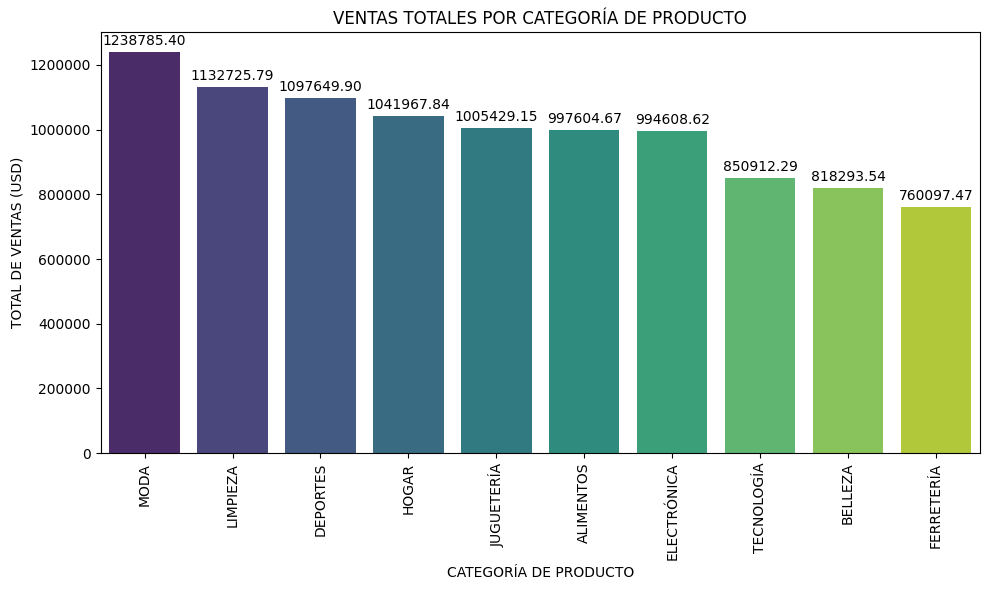

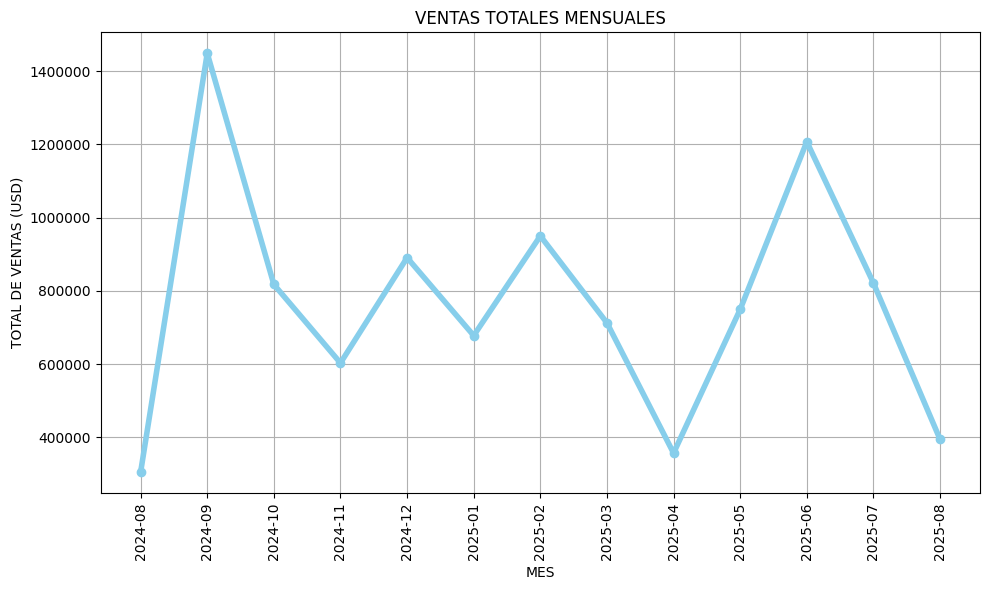

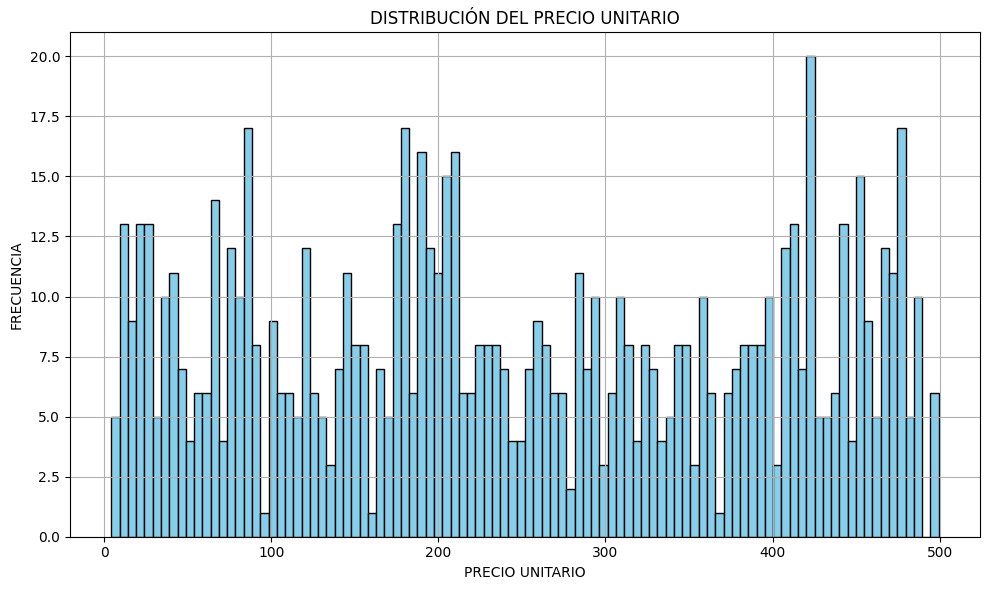

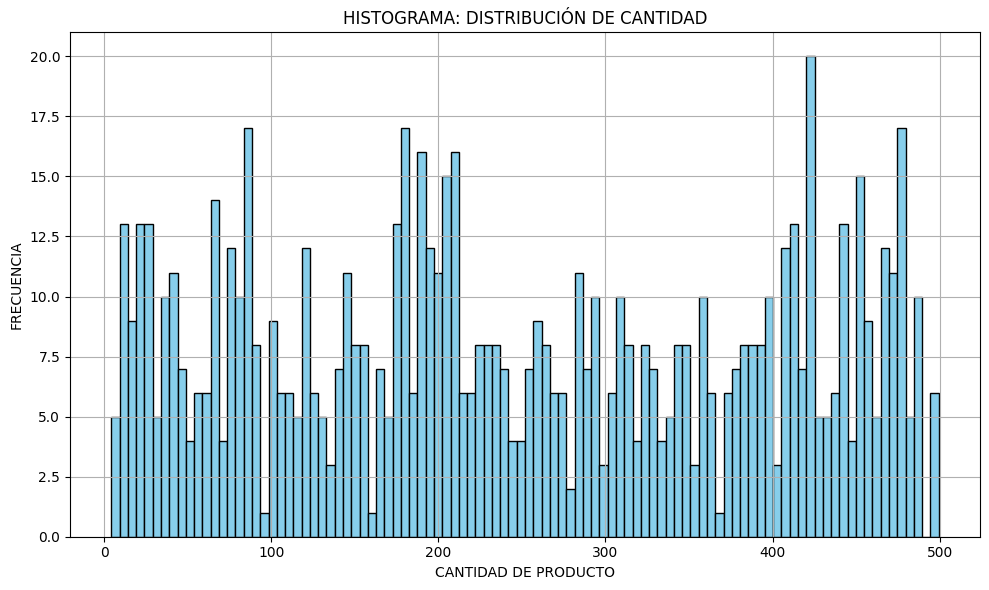

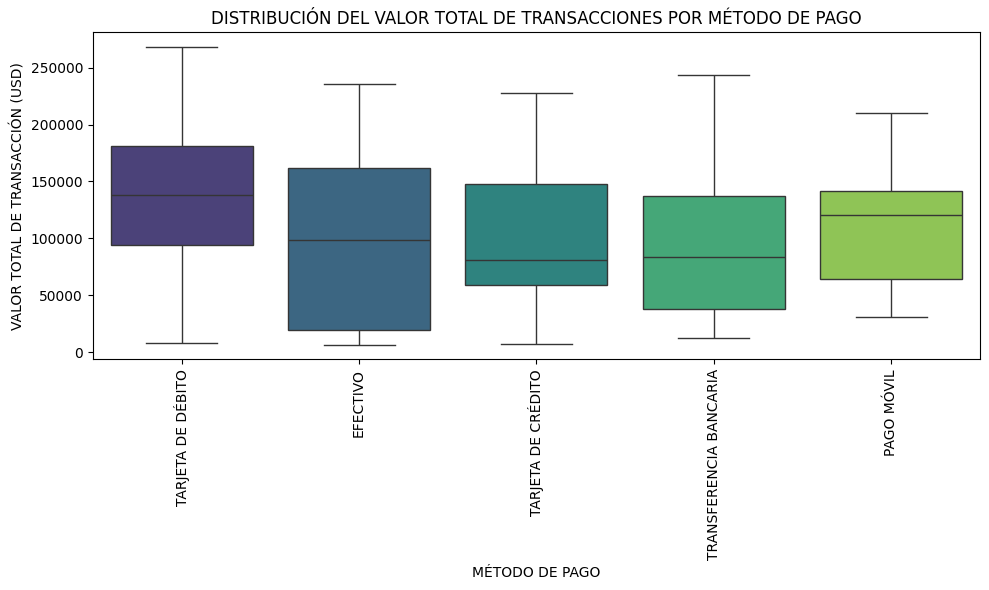


Gráfico 'Calificación del Producto vs. Cantidad' guardado como 'calificacion_vs_cantidad_productos.png'.


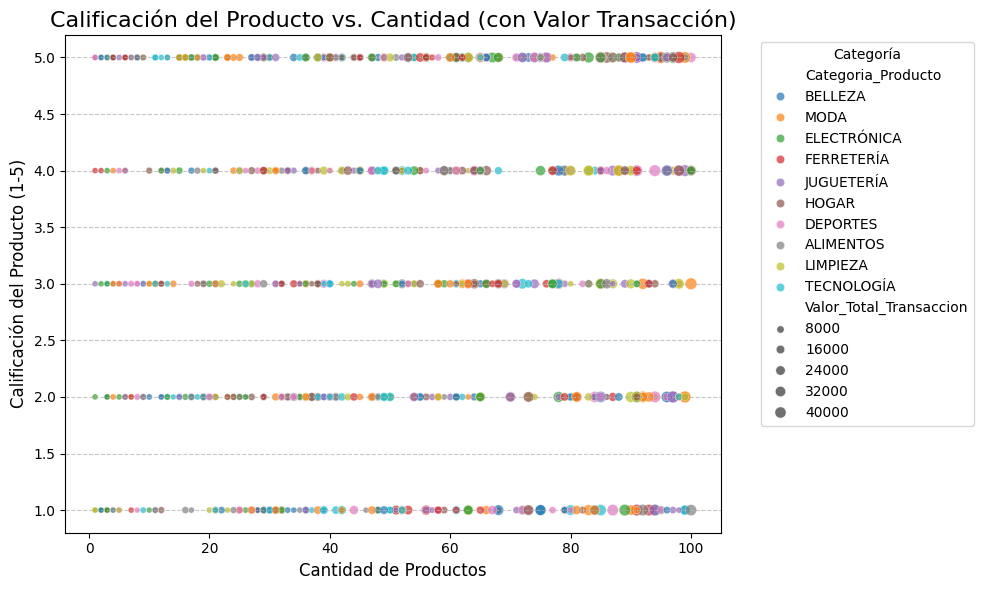

In [7]:
# Un gráfico de barras de ventas totales por categoría de producto.
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=ventas_por_categoria_prod,
    x="Categoria_Producto",
    y="Valor_Total_Transaccion",
    hue="Categoria_Producto",
    palette="viridis",
    legend=False,
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)
ax.ticklabel_format(style="plain", axis="y")
plt.title("Ventas totales por categoría de producto".upper())
plt.xlabel("Categoría de Producto".upper())
plt.ylabel("Total de Ventas (USD)".upper())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Un gráfico de líneas de las ventas totales a lo largo del tiempo (por mes o año).
analisis_mensual = (
    df.groupby(["Anio", "Mes_Numero"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index(name="Valor_Total_Ventas")
)
analisis_mensual["Mes_Anio"] = (
    analisis_mensual["Anio"].astype(str)
    + "-"
    + analisis_mensual["Mes_Numero"].astype(str).str.zfill(2)
)
analisis_mensual = analisis_mensual.sort_values(by="Mes_Anio")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    analisis_mensual["Mes_Anio"],
    analisis_mensual["Valor_Total_Ventas"],
    marker="o",
    color="skyblue",
    linewidth=4,
)
ax.ticklabel_format(style="plain", axis="y")
ax.set_xticks(analisis_mensual["Mes_Anio"])
ax.set_title("Ventas totales mensuales".upper())
ax.set_xlabel("Mes".upper())
ax.set_ylabel("Total de Ventas (USD)".upper())
ax.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histograma: Distribución del Precio Unitario o cantidad
plt.figure(figsize=(10, 6))
plt.hist(df["Precio_Unitario"].dropna(), bins=100, color="skyblue", edgecolor="black")
plt.title("Distribución del Precio Unitario".upper())
plt.xlabel("Precio Unitario".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["Precio_Unitario"].dropna(), bins=100, color="skyblue", edgecolor="black")
plt.title("Histograma: Distribución de cantidad".upper())
plt.xlabel("Cantidad de producto".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Valor Total de Transacción por Método de Pago
transacciones_metodos = (
    df.groupby(["ID_Transaccion", "Metodo_Pago"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index()
)
transacciones_metodos = transacciones_metodos.sort_values(
    by="ID_Transaccion", ascending=True
)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=transacciones_metodos,
    x="Metodo_Pago",
    y="Valor_Total_Transaccion",
    palette="viridis",
    hue="Metodo_Pago",
    legend=False,
)
plt.title("Distribución del Valor Total de Transacciones por Método de Pago".upper())
plt.xlabel("Método de Pago".upper())
plt.ylabel("Valor Total de Transacción (USD)".upper())
plt.xticks(rotation=90)
plt.tight_layout()
# Guardar figura
plt.savefig("BoxPlot")
plt.show()

# Scatter Plot: Calificación vs Cantidad
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    x="Cantidad_Producto",
    y="Calificacion_Producto",
    hue="Categoria_Producto",
    data=df,
    size="Valor_Total_Transaccion",
    alpha=0.7,
    ax=ax,
)
ax.set_title(
    "Calificación del Producto vs. Cantidad (con Valor Transacción)", fontsize=16
)
ax.set_xlabel("Cantidad de Productos", fontsize=12)
ax.set_ylabel("Calificación del Producto (1-5)", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)  
plt.legend(
    title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left"
) 
plt.tight_layout()
# Guardar esta figura
plt.savefig("calificacion_vs_cantidad_productos.png")
print(
    "\nGráfico 'Calificación del Producto vs. Cantidad' guardado como 'calificacion_vs_cantidad_productos.png'."
)
plt.show()

# 7️⃣ Conclusiones y Reflexión
Para el presente ejercicio práctico el desafío grande era programar en Python ya que ninguno de los que estamos en el grupo tenemos contacto directo con este lenguaje de programación. Pero se nos dio la oportunidad y contra todo problema se metió esfuerzo para aprender y poder cumplir con lo requerido.

Otro desafío fue tener cambiar de perspectiva con relación a como se programa en otros lenguajes de programación(Java, C#) versus Python. Hay varias instrucciones que nos dejan asombrados por la forma de hacer mucho en pocas líneas de código, todo gracias a los desarrolladores de estas excelentes libraries.

## Conclusiones
🟡 El presente ejercicio práctico nos ayuda a agregar conocimientos extras que no discutieron en la clase síncrona, a reforzar lo aprendido. Pero a tener el compromiso de seguir investigando y mejorando.   

🟡 Pandas es una library muy versátil con simples instrucciones nos evita toda la abstracción de tener que hacer calculos con grandes cantidades de datos de manera manual o tener que programarlos. Se logra ahorrar mucho código, se hace mucho en pocas líneas y expresiones.   

🟡 Las libs para generar los gráficos PyPlot y Seaborn son bien potentes, se puede generar toda clase de gráficos. Lo más importante de todo es que son gratuitas, no se debe invertir dinero para hacer gráficos profesionales.   

🟡 Python tiene un gran ecosistema de libraries gratuitas y de pago para ser utilizadas por nosotros como futuros científicos de datos.   

🟡 Python al tener enteros de precisión arbitraria se puede almacenar y hacer cálculos con cualquier clase de números sin tener que preocuparse por errores de tamaños de tipos(overflow) como sucede en otros lenguajes.   

🟡 En el dataset propuesto, encontramos que solo existe un item/artículos por transacción. En la vida real cuando una persona se va de compras, esta adquiere varios artículos en una sola compra. Se mejoró el diseño del dataset generado sintéticamente, hay una transacción y en cada transacción hay varias compras de artículos, la transacción solo contiene una fecha única.   

🟡 Para ejecutar el notebook de manera correcta en distintos entorno, sistemas, dispositivo se debe controlar mediante programación las dependencias externas a instalar antes de que se ejecuten las instrucciones que importan o llaman esas dependencias. El presente notebook se puede ejecutar en distintos ambientes sin problema entre los cuales están probados un kernel local de Python(máquinas de cada integrante del grupo), un kerner remoto de Jupyter lab, Google colab.    

## Recomendaciones
🟡 Probar cada uno de los métodos que proporciona la API de Pandas. Siempre tener cuidado con usar referencias si lo que se quiere es modificar el dataset original volver a reasignar la variable para obtener los cambios.

🟡 Profundizar a detalle en el manejo de las libs para generar gráficos. Se requiere más tiempo para profundizar a detalle y hacer unos gráficos más estilizados y profesionales.  
 
🟡 Cambiar solo las constantes para controlar la generación del dataset para el experimento. Se requiere hacer validación para comprobar los valores de las constantes(limitación del tiempo), pero si el desarrollador o científico de datos coloca bien los valores, el dataset se generará sin inconvenientes.   